# Módulo 1 - Fundamento de Machine Learning
## Desafio

## Objetivos

__Exercitar os seguintes conceitos trabalhados no Módulo__

- Análise exploratória dos dados (EDA - Exploratory Data Analysis)
- Preparação dos dados
- Análise de modelos

__Enunciado__

Neste desafio serão abordados todos os conceitos apresentados durante a disciplina 
Fundamentos de Machine Learning (FAM). 

Para este desafio será utilizada uma versão modificada do dataset “Bike Sharing” 
disponível no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).. 

Esse dataset contém um conjunto de informações sobre o compartilhamento de bicicletas. 
Existem informações sobre as condições climáticas e dados sobre a locação das bicicletas. 
Para este desafio é necessário baixar o arquivo “comp_bikes_mod.csv” presente neste 
[link](https://drive.google.com/file/d/1gUV6yHZfHWBQoHxApg6VZ85oVKgIlxx4/view).

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
dt_frame = pd.read_csv('dataset/comp_bikes_mod.csv')

In [14]:
dt_frame.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


__1 - No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?__

__R:__ 17379, 17

In [32]:
dt_frame.shape

(17379, 17)

__2 - Quantos tipos diferentes de dados existem no dataset do desafio?__

__R:__ 2

In [34]:
dt_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


__3 - Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?__
__R:__ 10%


In [36]:
notas_nulas = data_set.isna().sum()
notas_nulas[notas_nulas > 0]
p = (dt_frame['temp'].isna().sum()/len(dt_frame['temp']))*100
print(round(p),'%')

10.0 %


__4 - Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?__

__R:__ 15641,17

In [40]:
dt_frame= dt_frame.dropna(axis=0, how='all', thresh=None, inplace=False)
dt_frame['dteday']
dt_frame.shape

(15641, 17)

__5 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?__

__R:__ 0,496

In [42]:
dt_frame['temp'].mean()

0.4969259206597582

__6 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?__

__R:__ 0,122

In [43]:
dt_frame['windspeed'].std()

0.12230930508286268

__7 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?__

__R:__ 4

In [44]:
categoricos =  pd.get_dummies(dt_frame['season'])
categoricos.head()

,1.0,2.0,3.0,4.0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0


__8 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?__

__R:__ 2012-12-31 

In [46]:
dt_frame['new_dteday'] = pd.to_datetime(dt_frame['dteday'])
dt_frame['dteday'].tail()

17373    2012-12-31
17374    2012-12-31
17375    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, dtype: object

__9 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?__

__R:__ Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

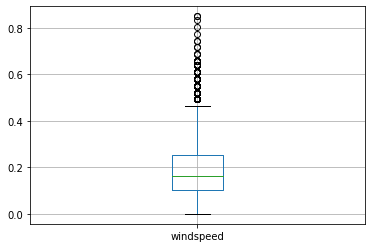

In [48]:
dt_frame.boxplot(['windspeed'])
dt_frame['windspeed'];

__10 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar__

__R:__ Possuem baixa correlação linear negativa. 

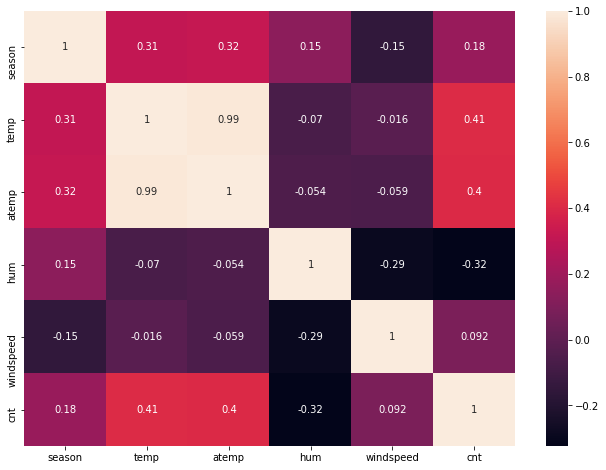

In [60]:
correlacao = dt_frame[["season", "temp", "atemp", "hum", "windspeed", "cnt"]].corr()
b = plt.subplots(figsize=(11, 8))
sns.heatmap(correlacao, annot=True);

__11 - Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.__

__R:__ 0.40

In [75]:
#Subistituindo valor nulos por valor médio de cada coluna
dt_frame['hum'].fillna(dt_frame['hum'].mean(), inplace=True)
dt_frame['cnt'].fillna(dt_frame['cnt'].mean(), inplace=True)
dt_frame['casual'].fillna(dt_frame['casual'].mean(), inplace=True)

#Definindo feature e target   
feature = dt_frame[['hum','casual']]
target = dt_frame[['cnt']]

#Criando modelo de regressao linear
LinearReg = LinearRegression()

#Treinamento de modelo
LinearReg.fit(feature,target)

#Realizando predição
previsao = LinearReg.predict(feature)

print('Regrassao: ', round(LinearReg.score(feature,target),3))

Regrassao:  0.406


__12 - Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".__

__R:__ 0,70

In [78]:
#Criando instancia do modelo DecisionTreeRegressor
tree = DecisionTreeRegressor() 

tree.fit(feature,target)

print('R2 ',round(tree.score(feature,target),4))

R2  0.7098


__13 - Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:__

__R:__ O valor obtido pela árvore de decisão como regressor apresenta maior R2 

__14 - Com base na árvore de decisão é CORRETO afirmar:__

__R:__ Pode ser utilizada para classificação e regressão.

__15: Comparando o SVM com a árvore de decisão é CORRETO afirmar:__

__R:__ SVM encontra o hiperplano que gera a maior separação entre os dados.